# Examples:

## Rename .dcm files in the directory

In [1]:
# The script renames all dcm files in the specified folder and sub folders in case if they not ends with .dcm or has 
# too long name which creates problems when handling files

In [2]:
import main_functions
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sb
sb.set(context='poster', style='whitegrid')

%matplotlib inline

In [3]:
# Specify directory here
directory = r'.\Test-patients (TCIA LUNG1)' # directory with patients

### Warning: if you set replace_names_with_numbers = True it will change name for all dicom files to ordered int values, 
#original file names will be lost.
replace_names_with_numbers = False  # if True, it'll overwrite original filenames with numeric order ex: 0_RTSTRUCT.dcm,1_CT.dcm,2_CT.dcm ...

In [4]:
#execute_rename_function
folders = os.listdir(directory)
print(len(folders),' patients found')
main_functions.rename_dcms(folders,directory,replace_names_with_numbers)

3  patients found


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 749.61it/s]


'Done!'

# Dataset Exploration

In [5]:
# This script parses the dataset and collect specified parameters per patient

In [6]:
# Specify directory here
directory = r'.\Test-patients (TCIA LUNG1)' # directory with patients

In [7]:
# Parameters in the list should have exactly the same tag names as it implemented in pydicom library https://pydicom.github.io/pydicom/0.9/index.html 
param_list = ['PatientName','ConvolutionKernel','SliceThickness','PixelSpacing','KVP','Exposure','XRayTubeCurrent','SeriesDate','SeriesInstanceUID']

In [8]:
dataset_stats = main_functions.parse_dataset(directory,param_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.53it/s]


In [9]:
dataset_stats.head(5)

,PatientName,ConvolutionKernel,SliceThickness,PixelSpacing,KVP,Exposure,XRayTubeCurrent,SeriesDate,SeriesInstanceUID
0,2342949070,B19f,3.0,"[0.9765625, 0.9765625]",120,400,80,20080918,1.3.6.1.4.1.32722.99.99.2989917765213423750108...
1,1155051171,NaN,3.0,"[0.9770, 0.9770]",NaN,NaN,NaN,NaN,1.3.6.1.4.1.32722.99.99.2329880015517990803358...
2,2654808846,NaN,3.0,"[0.9770, 0.9770]",NaN,NaN,NaN,NaN,1.3.6.1.4.1.32722.99.99.2389222799296192439904...


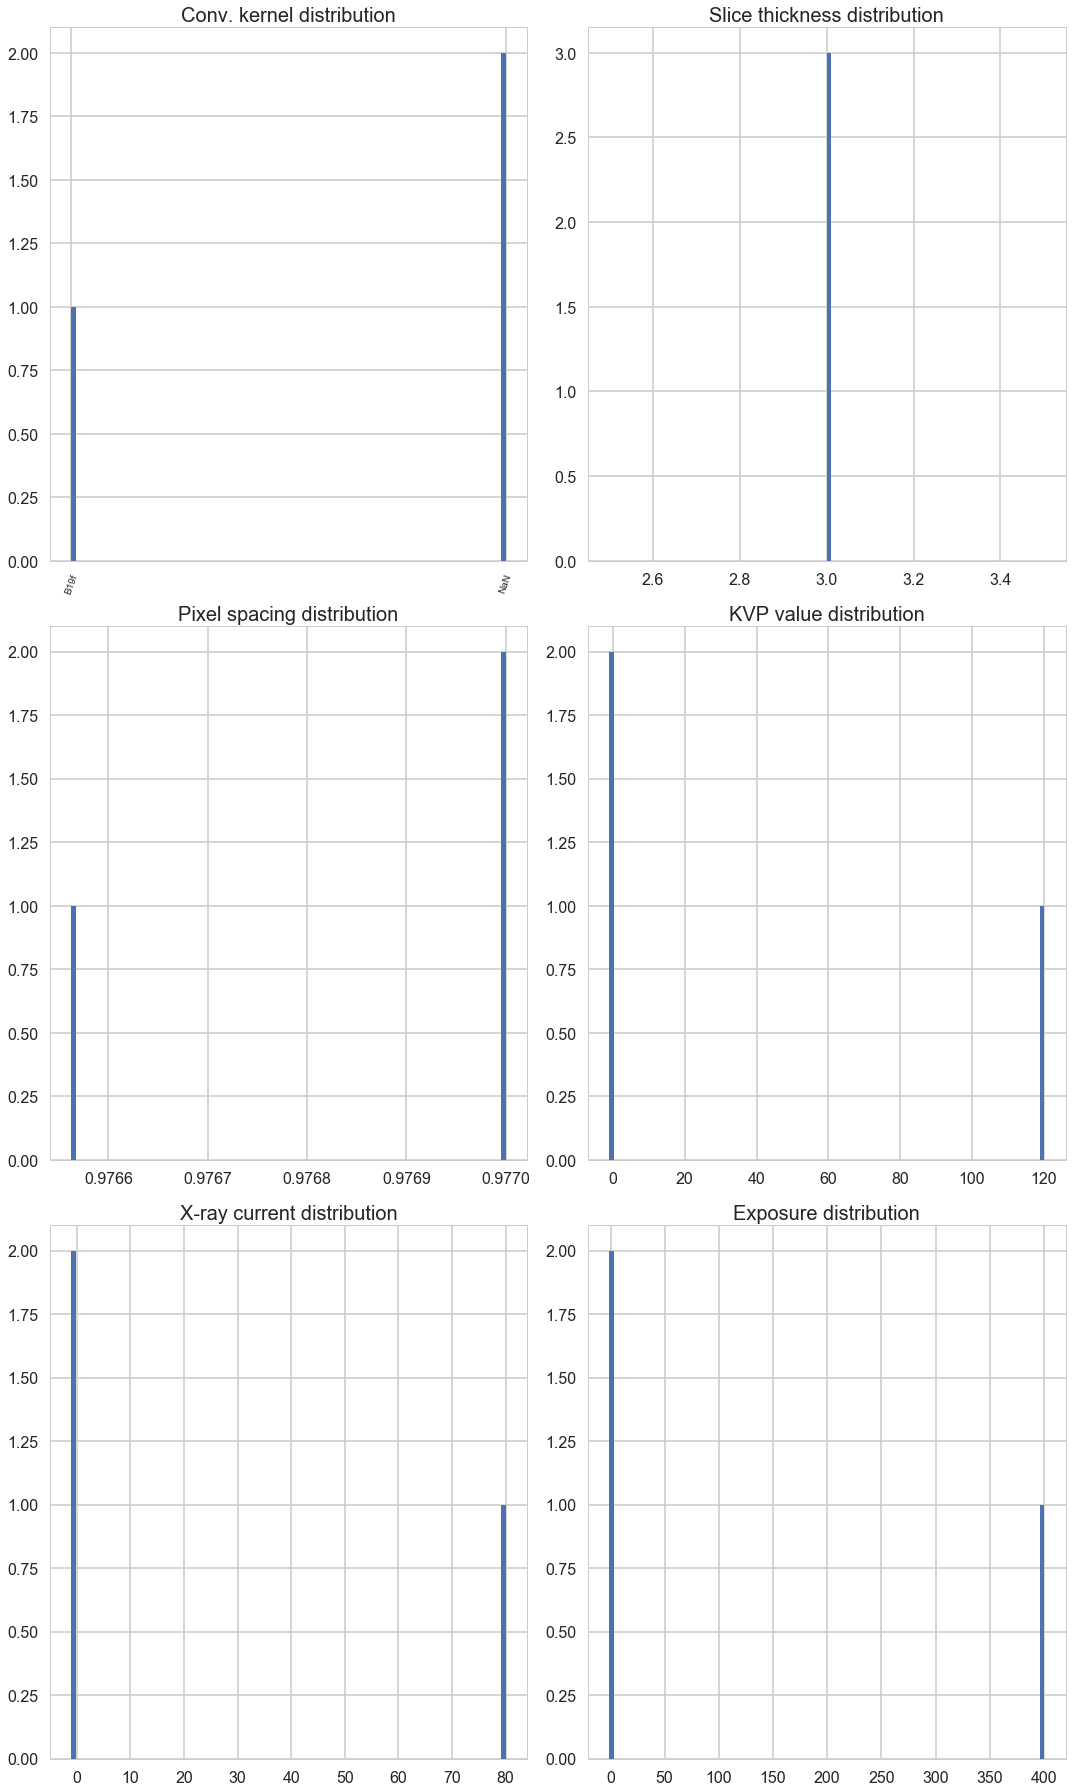

In [10]:
#Plot some of the scans parameters
kvp = [ -1 if x=='' or x=='NaN' else x for x in list(dataset_stats['KVP'])]
x_ray =[-1 if x=='' or x=='NaN' else x for x in list(dataset_stats['XRayTubeCurrent'])]
exp =[-1 if x=='' or x=='NaN' else x for x in list(dataset_stats['Exposure'])]
ps = [x[0] for x in list(filter(lambda x: x != 'NaN', dataset_stats['PixelSpacing'].values))]
sl_th = [x for x in list(filter(lambda x: x != 'NaN', dataset_stats['SliceThickness'].values))]

fig,ax = plt.subplots(3,2,figsize=(15,25))
ax[0,0].hist(list(dataset_stats.ConvolutionKernel.values),bins=100)
ax[0,0].set_title('Conv. kernel distribution',fontsize=20)
plt.sca(ax[0, 0])
plt.xticks(rotation=70,fontsize=10)
ax[0,1].hist(sl_th,bins=100)
ax[0,1].set_title('Slice thickness distribution',fontsize=20)
ax[1,0].hist(ps,bins=100)
ax[1,0].set_title('Pixel spacing distribution',fontsize=20)
ax[1,1].hist(kvp,bins=100)
ax[1,1].set_title('KVP value distribution',fontsize=20)
ax[2,0].hist(x_ray,bins=100)
ax[2,0].set_title('X-ray current distribution',fontsize=20)
ax[2,1].hist(exp,bins=100)
ax[2,1].set_title('Exposure distribution',fontsize=20)

fig.tight_layout()
plt.show()